<h1 style="font-size: 48px; text-align: center;">💰 Loan Approval Prediction 🏦</h1>

<p style="text-align: center; font-family:cursive; font-size:20px; font-height: 1.7em;">Thank you for visiting my notebook.</p>

***

<center>
    <img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExOWloc2pvN2Q3Zzh0ZTF3ZWoycjRzcTZkdTRvdHZqZHk3YnZiZzJ4aCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/7WYoluz0CLTd9y1MGW/giphy.gif">
</center>

# 👋 Introduction

<div class="alert alert-block alert-info" style="font-family: verdana; font-size: 20px; line-height: 1.7em;">
    The objective of this project is to develop a machine learning model that predicts whether a loan application will be approved based on the applicant's profile. Loan approval is a critical decision for financial institutions as it directly impacts risk management and profitability. By leveraging historical data, we aim to build a predictive model that can streamline the approval process, reduce risk, and improve decision-making efficiency.
</div>

# 📚 Problem Statement

<div class="alert alert-block alert-success" style="font-family: verdana; font-size: 20px; line-height: 1.7em;">
    Financial institutions often face challenges in determining which loan applicants are likely to default. Manually reviewing each application can be time-consuming, and human error may lead to inconsistent decision-making. Automating the process through machine learning can help improve accuracy, minimize defaults, and increase operational efficiency.
</div>

# 🔭 Feature Description

<div style="font-family:verdana; font-size: 20px; line-height: 1.7em;">
<ol>
<li><p><strong><code>person_age</code></strong>: The age of the loan applicant. Age can be an indicator of financial stability, experience, and repayment behavior.</p>
</li>
<li><p><strong><code>person_income</code></strong>: The annual income of the loan applicant. Higher income often correlates with a greater ability to repay loans.</p>
</li>
<li><p><strong><code>person_home_ownership</code></strong>: Indicates whether the applicant owns a home, rents, or has a mortgage. Homeownership is often a sign of financial stability, and owning assets may reduce the likelihood of default.</p>
</li>
<li><p><strong><code>person_emp_length</code></strong>: The number of years the applicant has been employed. Longer employment histories typically indicate job stability, which can positively influence loan approval.</p>
</li>
<li><p><strong><code>loan_intent</code></strong>: The purpose of the loan (e.g., education, medical, personal, etc.). Different loan purposes might have varying risk levels for the lender.</p>
</li>
<li><p><strong><code>loan_grade</code></strong>: A credit score grade or classification assigned to the applicant. This is usually a key predictor of the borrower’s creditworthiness.</p>
</li>
<li><p><strong><code>loan_amnt</code></strong>: The amount of the loan that the applicant is requesting. Larger loan amounts could pose a higher risk for lenders, especially if the borrower has limited financial capacity.</p>
</li>
<li><p><strong><code>loan_int_rate</code></strong>: The interest rate applied to the loan. This can reflect the applicant&#39;s creditworthiness and the perceived risk of lending. Higher interest rates often accompany higher risk borrowers.</p>
</li>
<li><p><strong><code>loan_percent_income</code></strong>: The ratio of the loan amount to the applicant&#39;s income. This measures the burden of the loan relative to the applicant&#39;s earnings; a higher percentage may signal a higher risk of default.</p>
</li>
<li><p><strong><code>cb_person_default_on_file</code></strong>: Indicates whether the applicant has any history of defaulting on previous loans (Yes/No). A history of default is a strong predictor of future default risk.</p>
</li>
<li><p><strong><code>cb_person_cred_hist_length</code></strong>: The length of the applicant&#39;s credit history in years. A longer credit history gives more data to evaluate the applicant’s financial behavior, typically allowing for better risk assessment.</p>
</li>
</ol>
These features collectively provide a comprehensive profile of the applicant’s financial situation, employment stability, credit history, and loan requirements, all of which influence loan approval decisions.
</div>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
from IPython.display import display, HTML

warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.base import clone

from catboost import CatBoostClassifier, Pool

# Load Data

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv', index_col='id')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv', index_col='id')
orig_df = pd.read_csv('/kaggle/input/loan-approval-prediction/credit_risk_dataset.csv')

In [3]:
orig_df.index

RangeIndex(start=0, stop=32581, step=1)

In [4]:
train_df = pd.concat([train_df, orig_df])
train_df = train_df.reset_index(drop=True)

In [5]:
train_df.index

RangeIndex(start=0, stop=91226, step=1)

In [6]:
train_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91226 entries, 0 to 91225
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91226 non-null  int64  
 1   person_income               91226 non-null  int64  
 2   person_home_ownership       91226 non-null  object 
 3   person_emp_length           90331 non-null  float64
 4   loan_intent                 91226 non-null  object 
 5   loan_grade                  91226 non-null  object 
 6   loan_amnt                   91226 non-null  int64  
 7   loan_int_rate               88110 non-null  float64
 8   loan_percent_income         91226 non-null  float64
 9   cb_person_default_on_file   91226 non-null  object 
 10  cb_person_cred_hist_length  91226 non-null  int64  
 11  loan_status                 91226 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 8.4+ MB


## Removing Duplicate Data

In [8]:
train_df.duplicated().sum()

165

In [9]:
train_df.drop_duplicates(inplace=True)

## Handling Missing Values

In [10]:
train_df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [11]:
train_df['loan_int_rate'] = train_df['loan_int_rate'].fillna(train_df['loan_int_rate'].mean())
train_df['person_emp_length'] = train_df['person_emp_length'].fillna(train_df['person_emp_length'].mean())

# EDA

In [12]:
target = 'loan_status'

In [13]:
features = train_df.drop(target, axis=1).columns.tolist()

In [14]:
categorical_features = train_df.select_dtypes(include='object').columns.tolist()

In [15]:
numerical_features = list(set(features) - set(categorical_features))

In [16]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,91061.0,27.620683,6.150047,20.00,23.00,26.000000,30.00,144.00
person_income,91061.0,64774.320917,47922.855155,4000.00,40000.00,57000.000000,78000.00,6000000.00
person_emp_length,91061.0,4.732306,4.006237,0.00,2.00,4.000000,7.00,123.00
loan_amnt,91061.0,9351.508352,5848.017127,500.00,5000.00,8000.000000,12000.00,35000.00
loan_int_rate,91061.0,10.791001,3.056025,5.42,7.88,10.791001,13.04,23.22
loan_percent_income,91061.0,0.163158,0.097486,0.00,0.09,0.140000,0.22,0.83
cb_person_cred_hist_length,91061.0,5.812752,4.039820,2.00,3.00,4.000000,8.00,30.00
loan_status,91061.0,0.169546,0.375235,0.00,0.00,0.000000,0.00,1.00


In [17]:
train_df[categorical_features].describe(include='O').T

,count,unique,top,freq
person_home_ownership,91061,4,RENT,46972
loan_intent,91061,6,EDUCATION,18682
loan_grade,91061,7,A,31687
cb_person_default_on_file,91061,2,N,76629


In [18]:
for col in categorical_features:
    display(train_df.groupby(col)[['loan_amnt', 'loan_int_rate']].agg(['min', 'mean', 'max']))

loan_amnt                      loan_int_rate             \
                            min          mean    max           min       mean   
person_home_ownership                                                           
MORTGAGE                    500  10179.788836  35000          5.42  10.156543   
OTHER                      1000  10571.923077  25000          5.79  11.732887   
OWN                         900   8871.105946  35000          5.42  10.775195   
RENT                        500   8731.272396  35000          5.42  11.304888   

                              
                         max  
person_home_ownership         
MORTGAGE               22.48  
OTHER                  20.52  
OWN                    21.27  
RENT                   23.22

loan_amnt                      loan_int_rate             \
                        min          mean    max           min       mean   
loan_intent                                                                 
DEBTCONSOLIDATION       500   9315.149770  35000          5.42  10.742573   
EDUCATION               700   9198.682261  35000          5.42  10.770082   
HOMEIMPROVEMENT         500  10274.280433  35000          5.42  10.987601   
MEDICAL                 500   8980.716894  35000          5.42  10.847430   
PERSONAL                500   9360.252030  35000          5.42  10.740827   
VENTURE                 500   9378.480851  35000          5.42  10.724959   

                          
                     max  
loan_intent               
DEBTCONSOLIDATION  22.11  
EDUCATION          21.74  
HOMEIMPROVEMENT    23.22  
MEDICAL            21.74  
PERSONAL           22.06  
VENTURE            23.22

loan_amnt                      loan_int_rate                  
                 min          mean    max           min       mean    max
loan_grade                                                               
A                500   8480.407580  35000      5.420000   7.441076  19.04
B                500   9747.230389  35000      5.990000  11.014599  17.56
C                500   9087.000687  35000      5.790000  13.397243  16.29
D               1000  10661.303443  35000      6.000000  15.222013  19.13
E               1000  12539.439655  35000      6.000000  16.707096  23.06
F               1200  13997.756410  35000     10.791001  18.068582  22.06
G               1500  15618.298969  35000     10.791001  19.789742  23.22

loan_amnt                     loan_int_rate  \
                                min         mean    max           min   
cb_person_default_on_file                                               
N                               500  9277.775803  35000          5.42   
Y                               750  9743.003049  35000          5.99   

                                             
                                mean    max  
cb_person_default_on_file                    
N                          10.136849  21.74  
Y                          14.264327  23.22

# Feature Distribution

In [19]:
def feature_distribution_plot(df, col, target_col=None):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    if df[col].dtype != 'object':
        sns.histplot(data=df, x=col, hue=target_col)
    else:
        sns.countplot(data=df, x=col, hue=target_col)
    plt.ylabel('Count')
    plt.xlabel(f'{col}')
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1,2,2)
    if df[col].dtype != 'object':
        sns.boxplot(data=df, x=col, hue=target_col)
        plt.title(f'Boxplot of {col}')
        plt.ylabel('Count')
        plt.xlabel(f'{col}')
    else:
        df[col].value_counts().plot(kind='pie', autopct='%.0f%%',pctdistance=0.85,fontsize=12)
        plt.gca().add_artist(plt.Circle((0,0),radius=0.7,fc='white'))
        plt.title(f'Pie Chart of {col}')
        plt.xlabel('')
        plt.ylabel('')
    
    
    plt.tight_layout()
    plt.suptitle(f'Distribution of {col}', y=1.05, size=24, weight='bold')
    plt.show()

## Distribution of Numerical Features

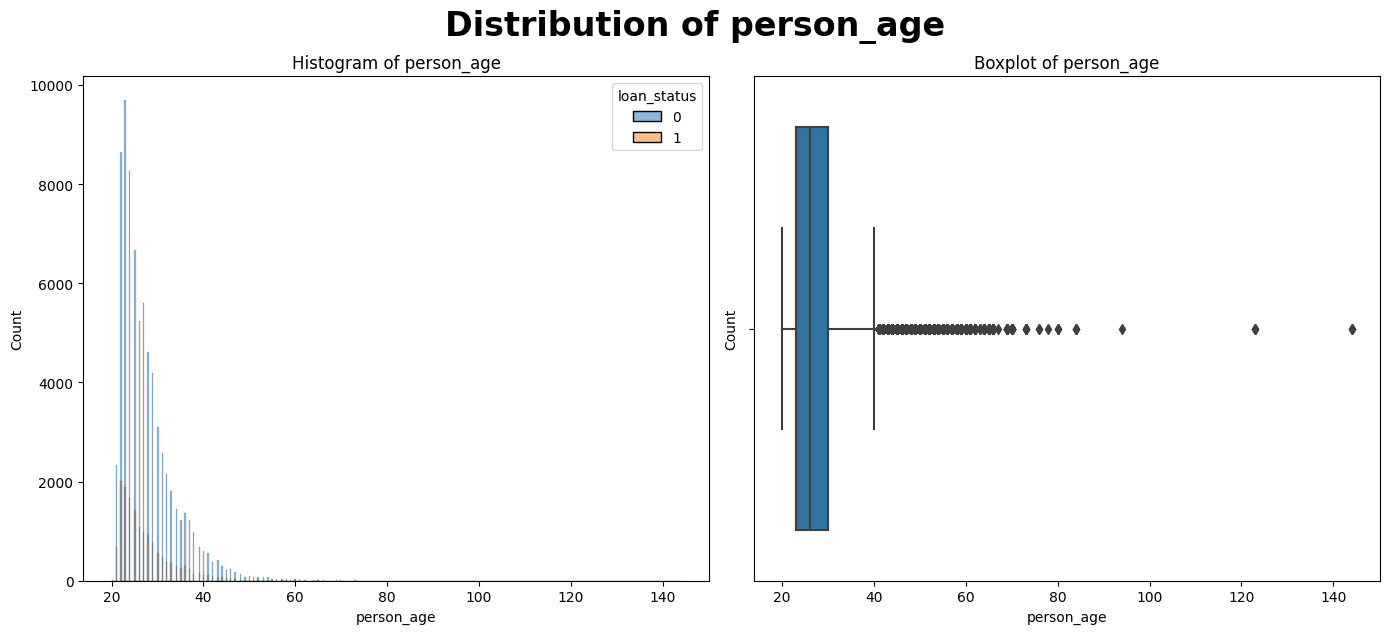

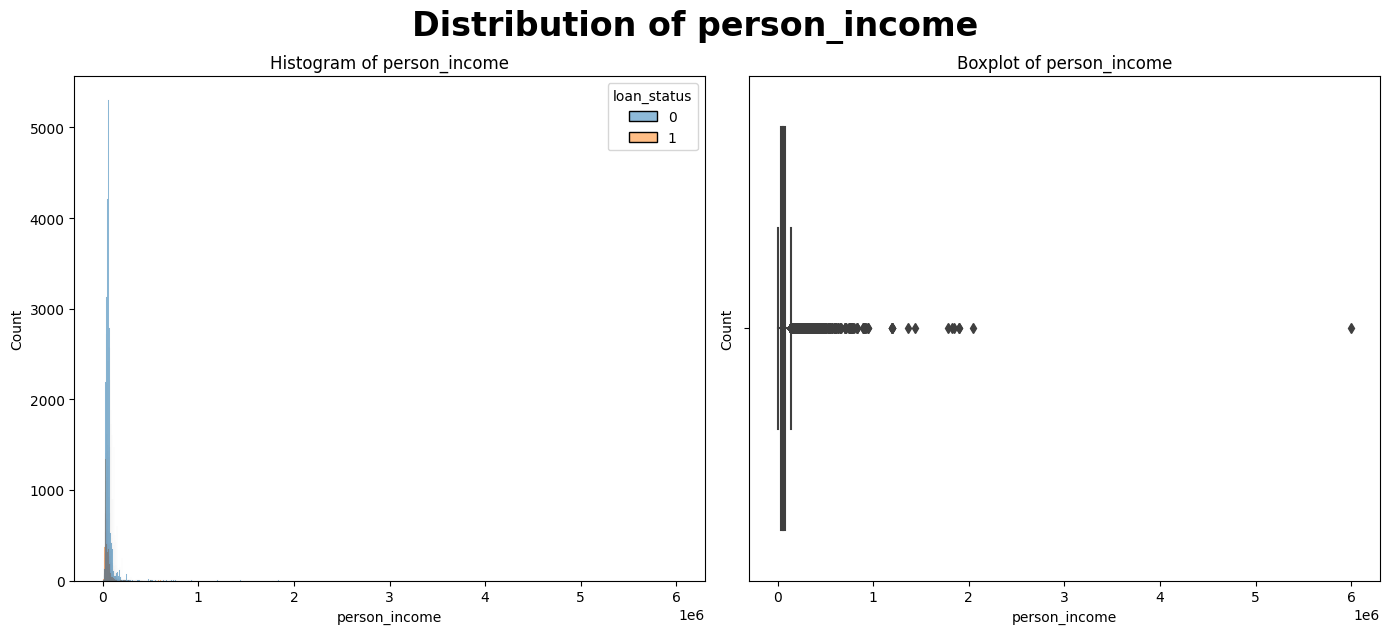

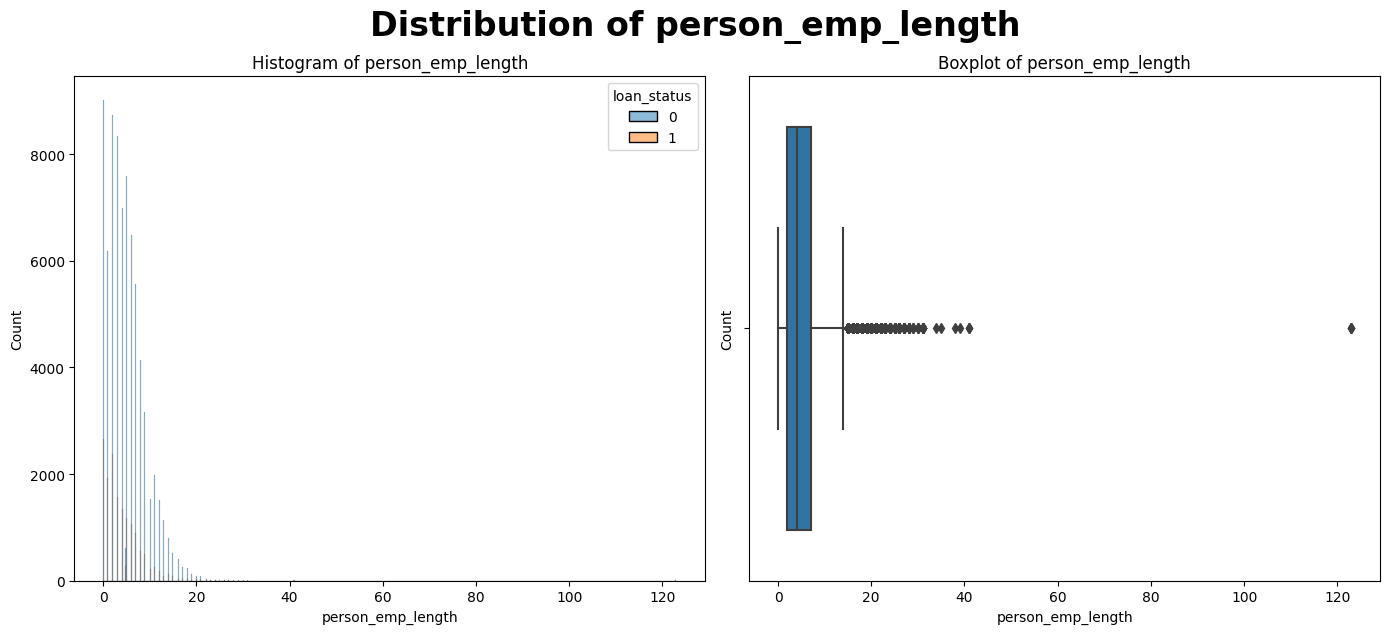

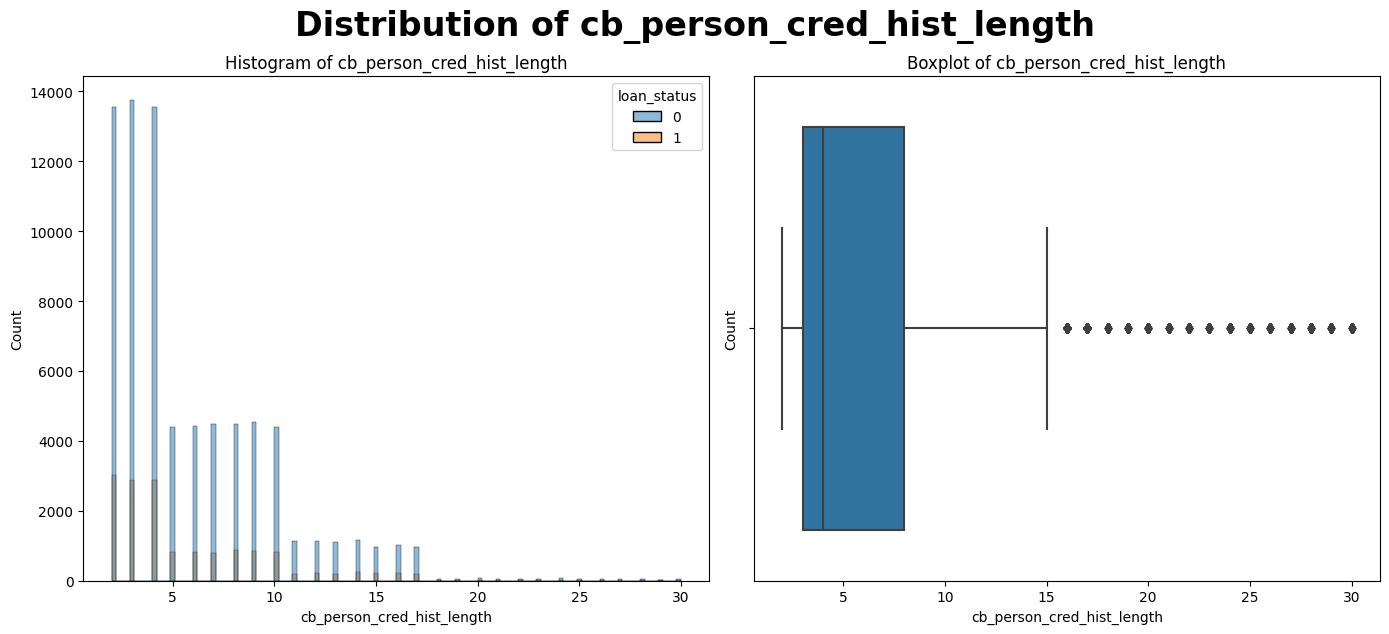

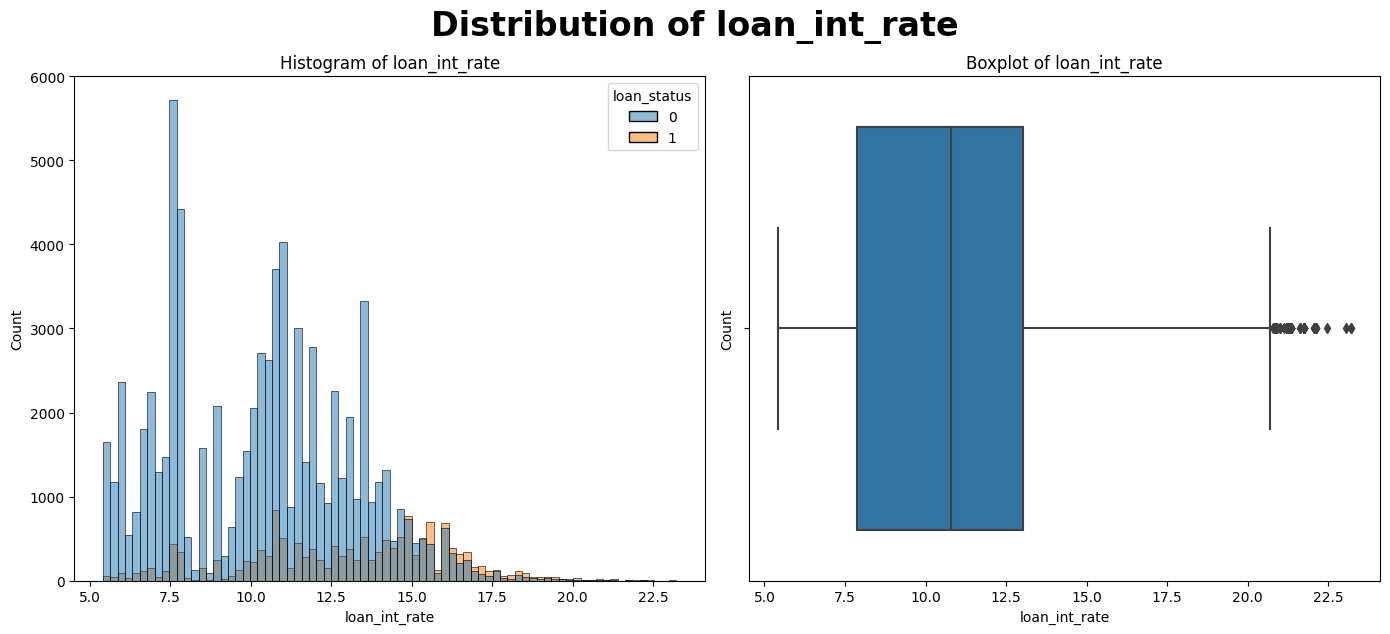

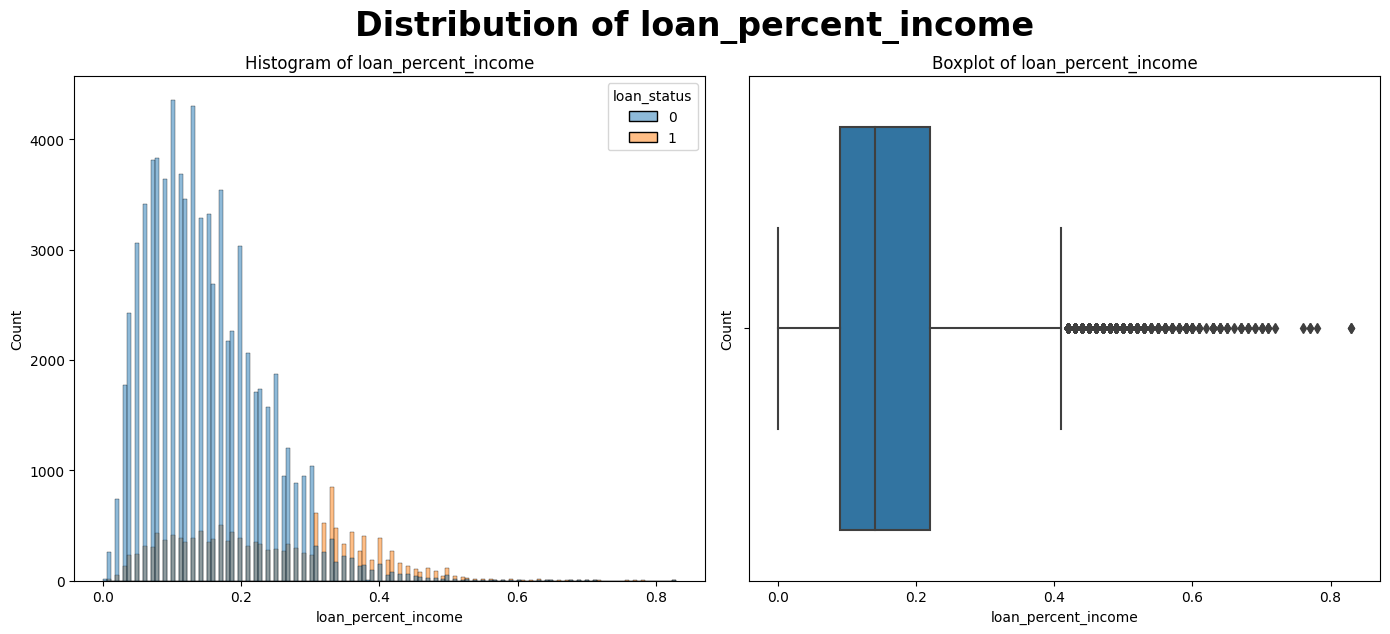

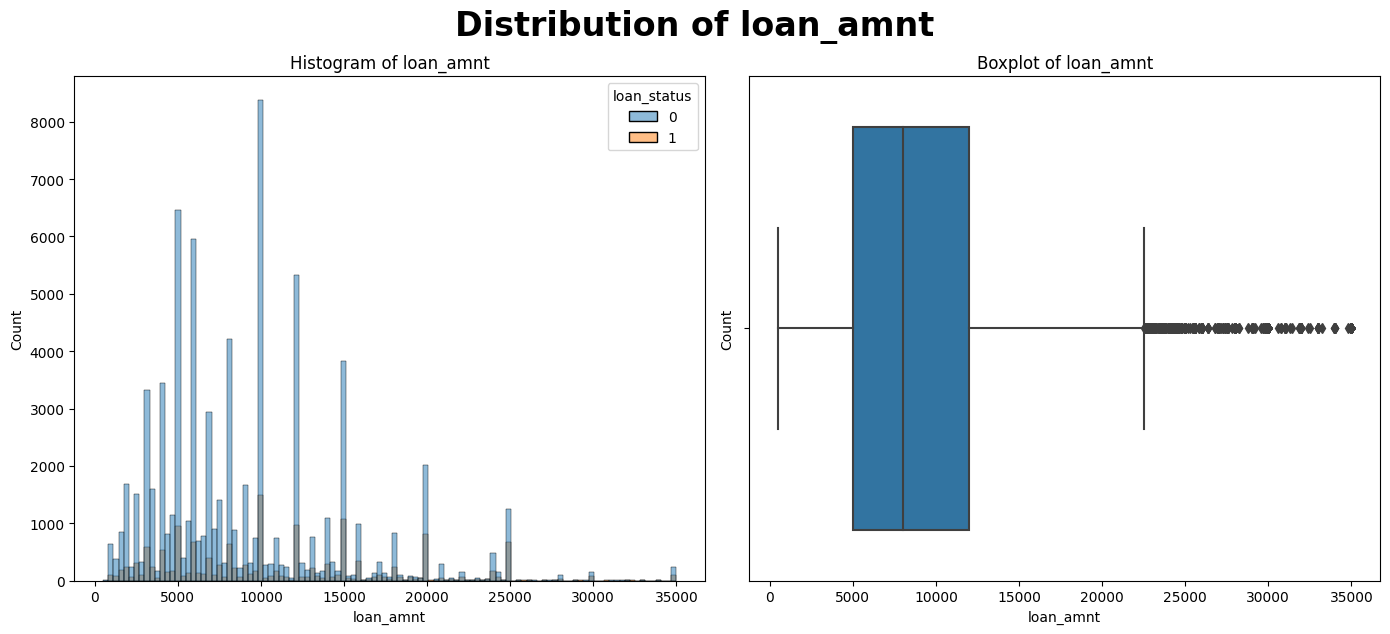

In [20]:
for col in numerical_features:
    feature_distribution_plot(train_df, col, target)

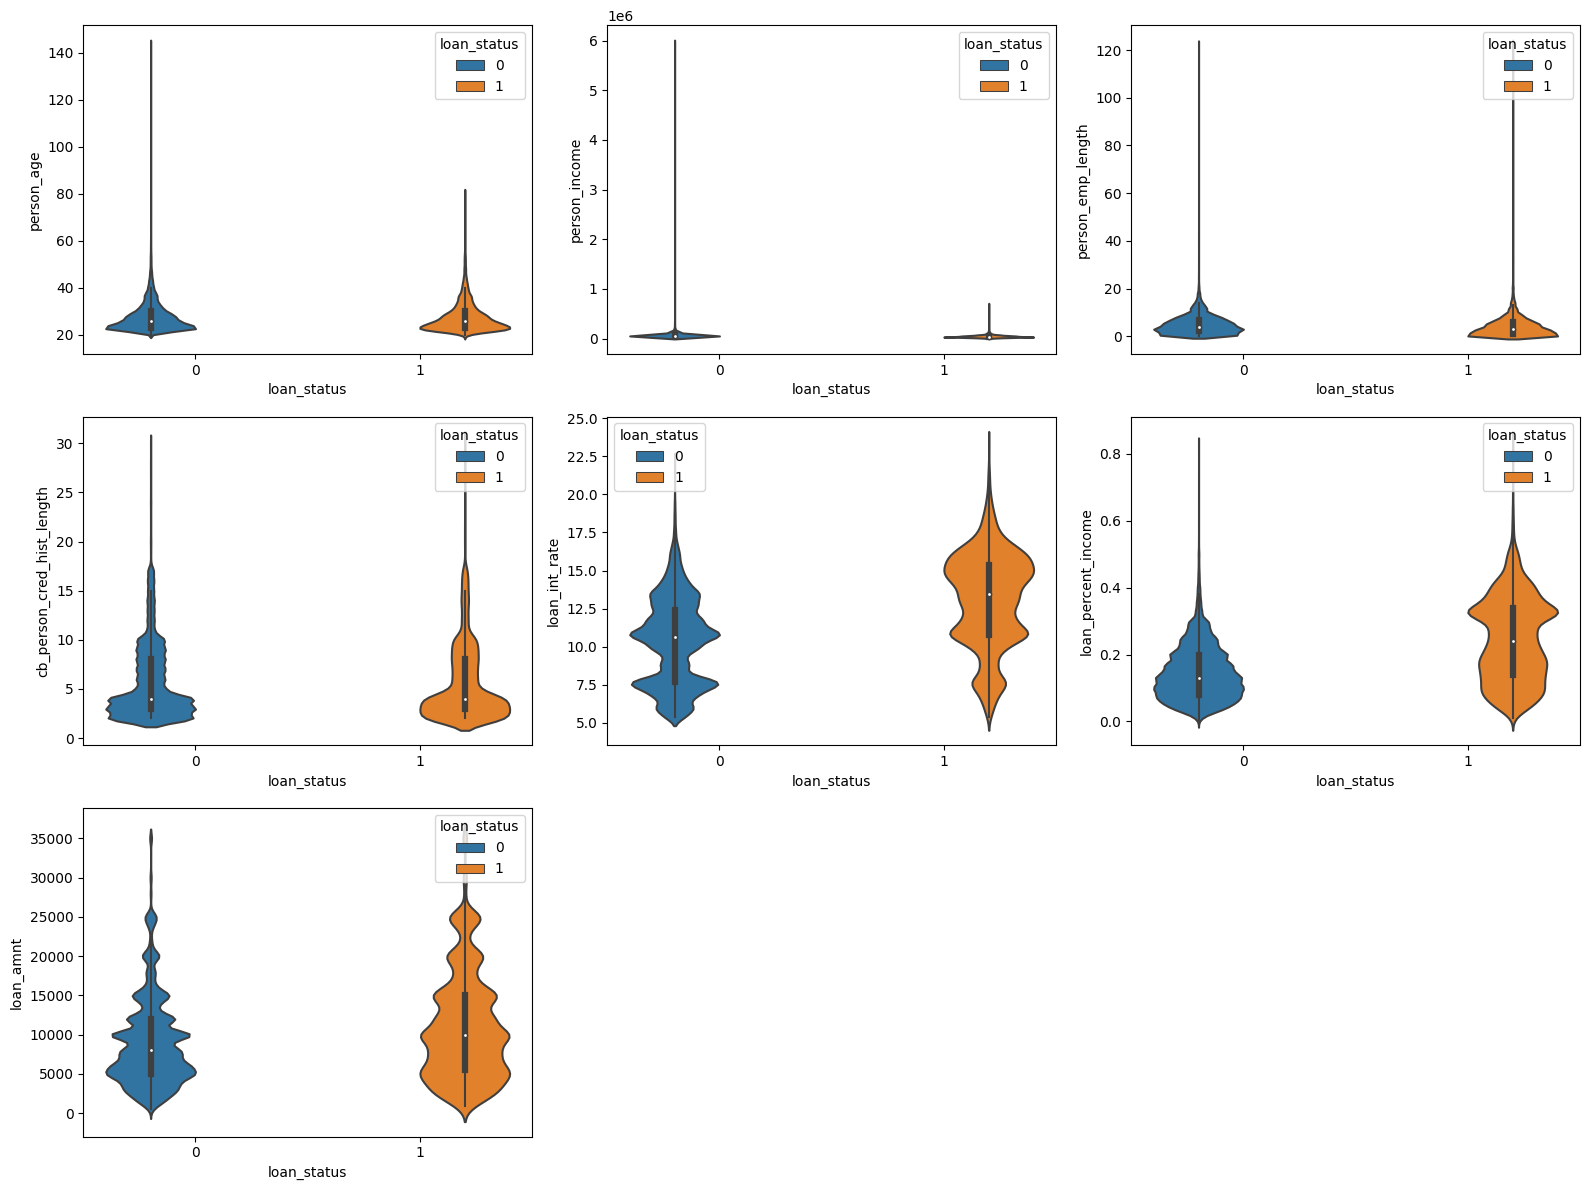

In [21]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.violinplot(train_df, x=target, y=col, hue=target, legend=None)

plt.tight_layout()
plt.show()

## Distribution of Categorical Features

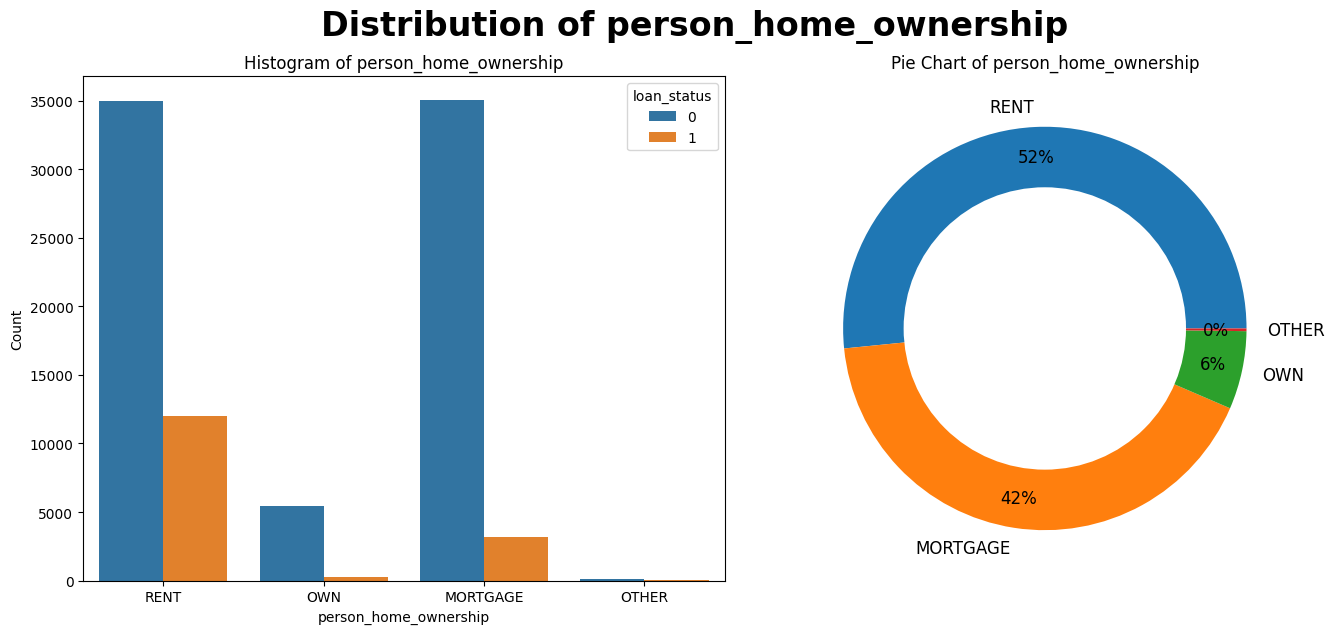

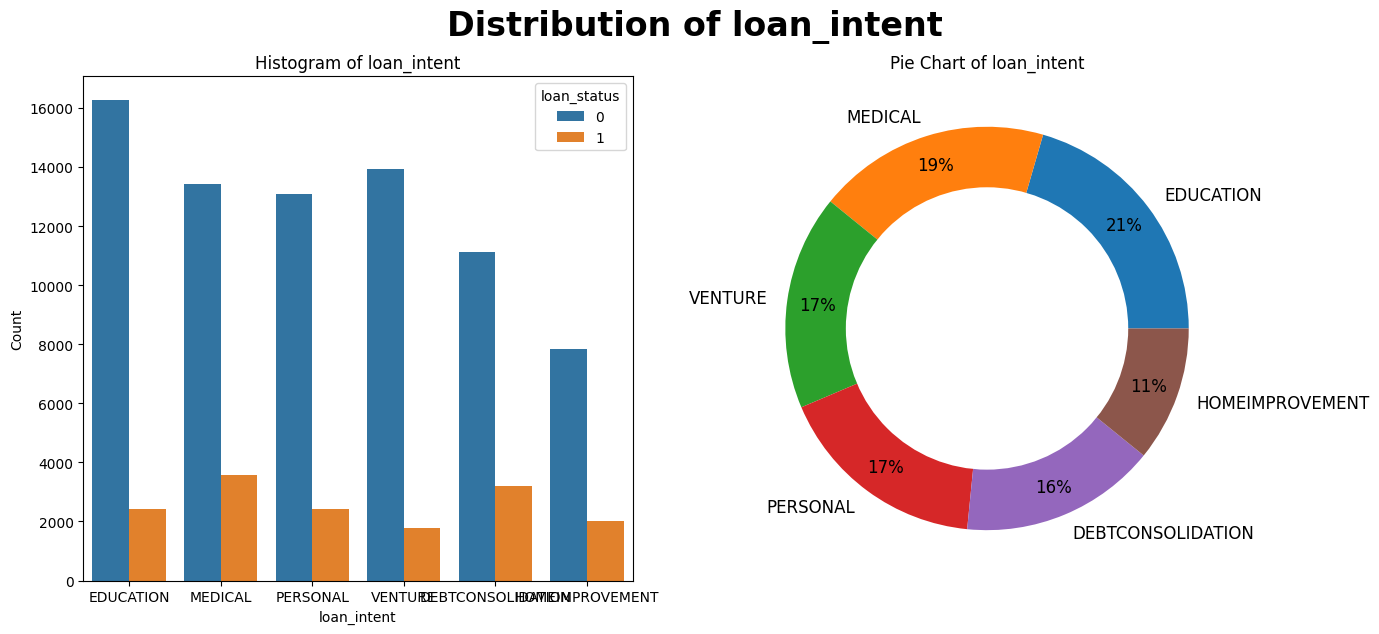

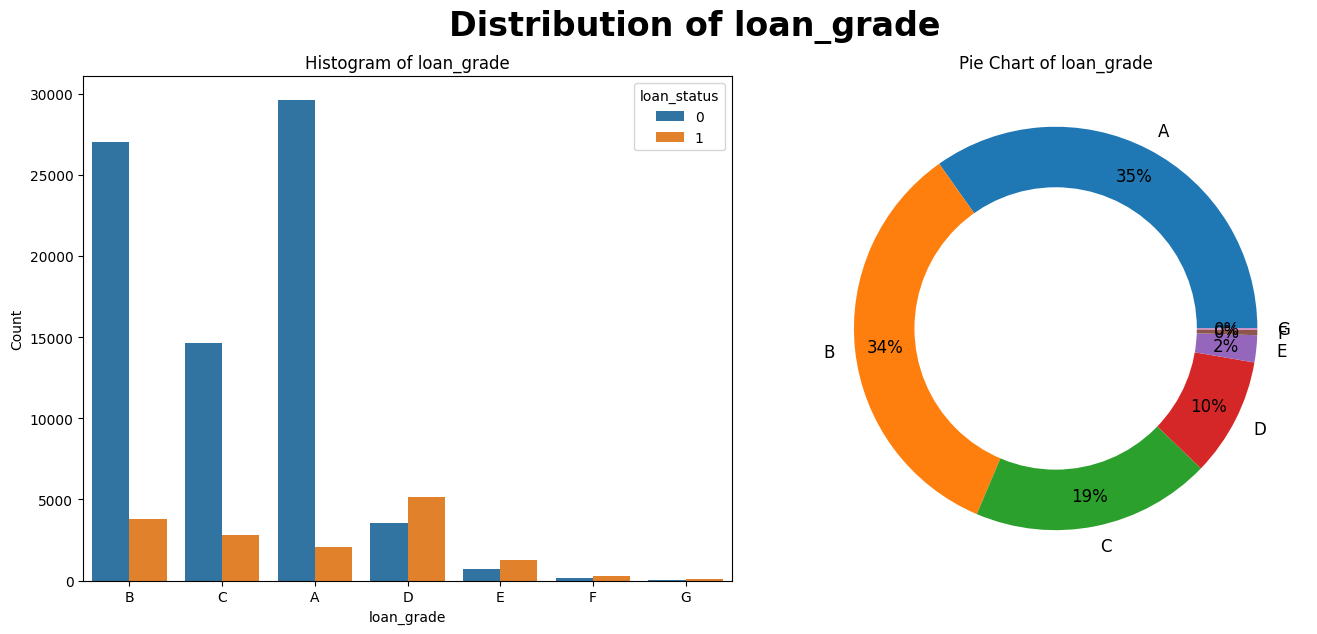

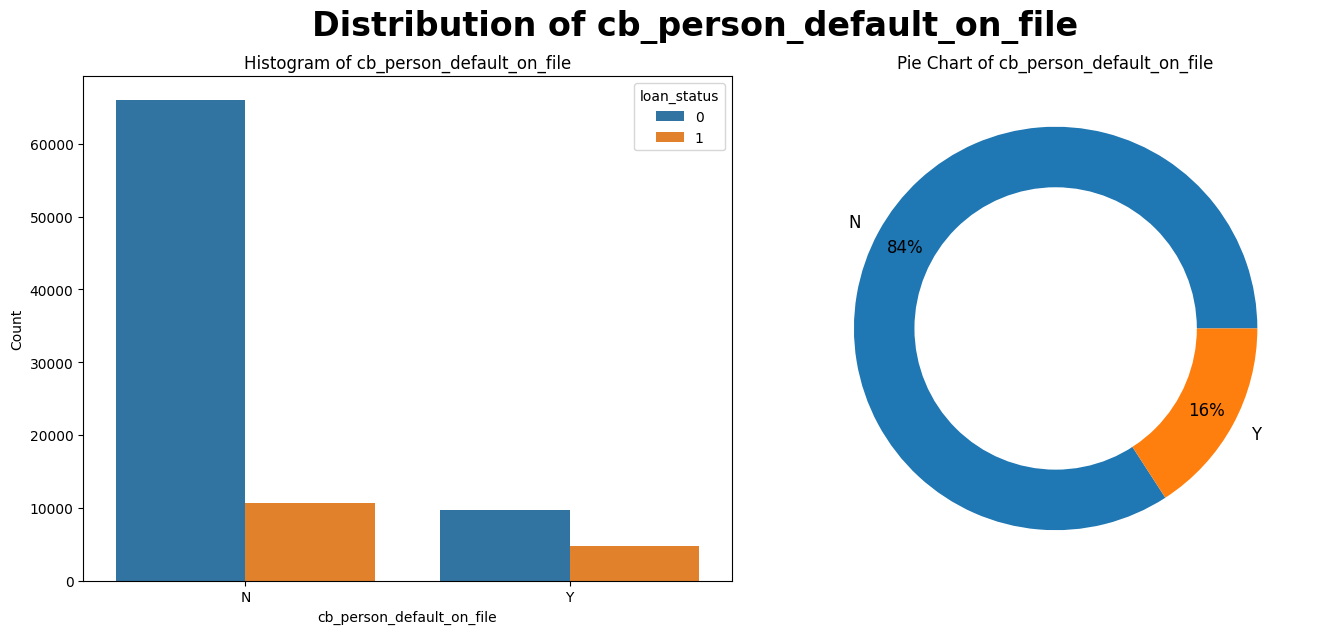

In [22]:
for col in categorical_features:
    feature_distribution_plot(train_df, col, target)

## Target Distribution

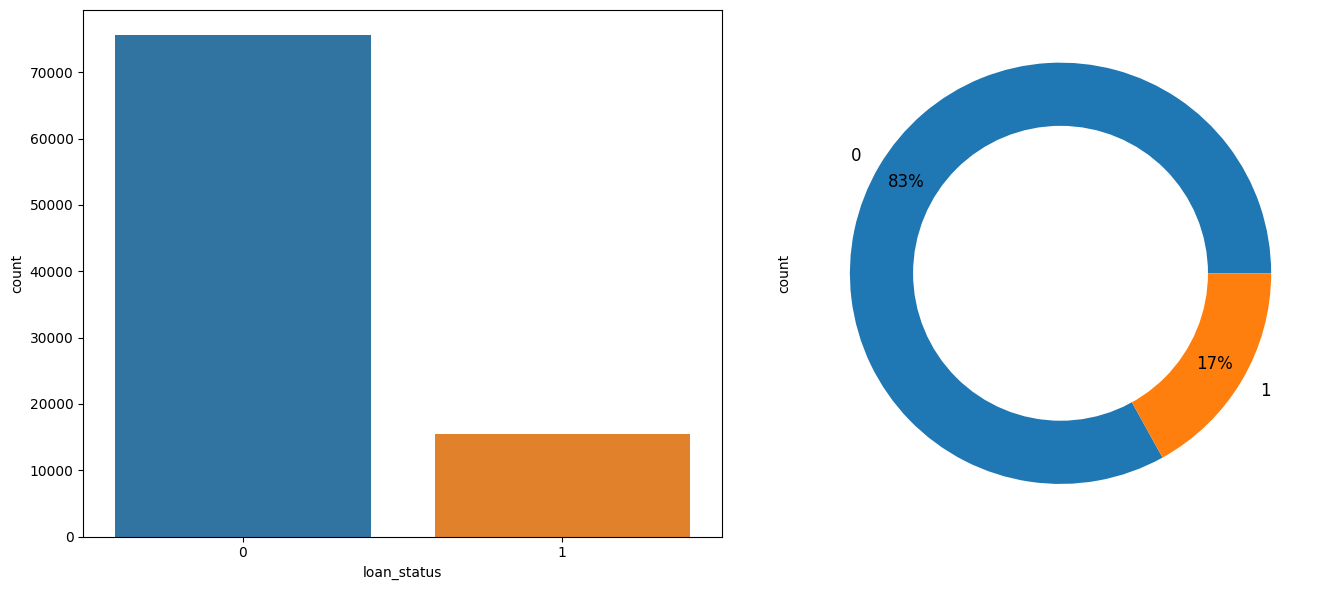

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(train_df, x=target)

plt.subplot(1,2,2)
train_df[target].value_counts().plot.pie(autopct='%.0f%%',pctdistance=0.85,fontsize=12)
plt.gca().add_artist(plt.Circle((0,0),radius=0.7,fc='white'))

plt.tight_layout()
plt.show()

## Correlation Matrix

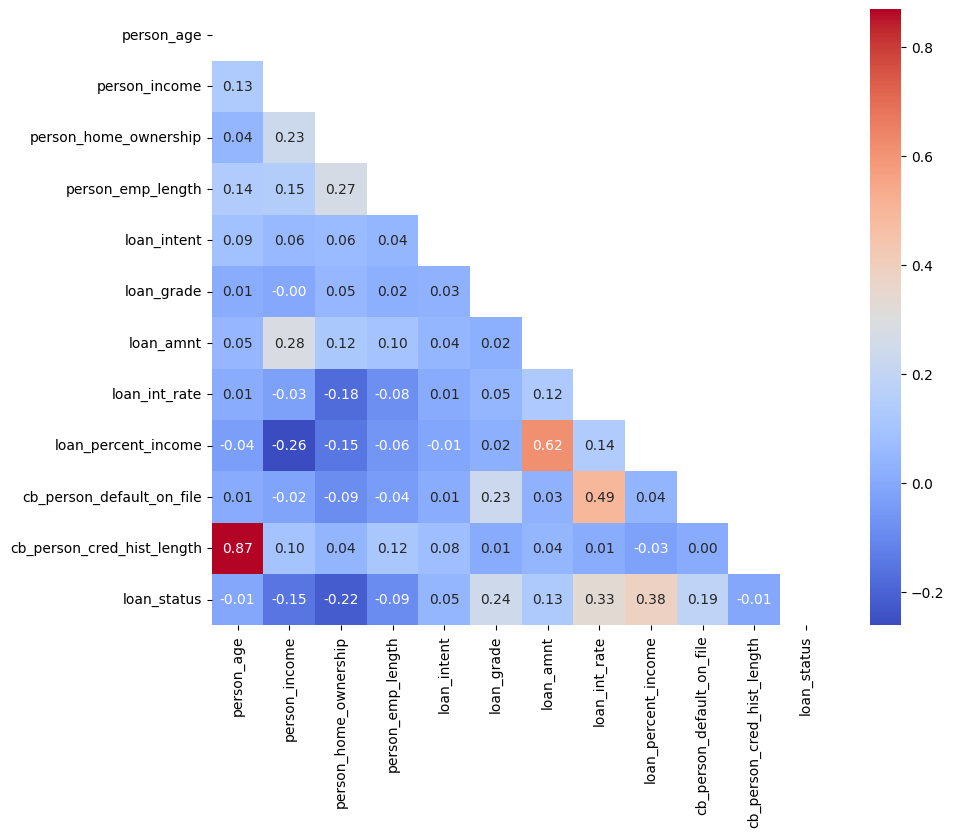

In [24]:
train_new = train_df.copy()

for col in categorical_features:
    train_new[col], _ = train_new[col].factorize()

cor_mat = train_new.corr()
mask = np.triu(cor_mat)

plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, fmt='.2f', annot=True, mask=mask, cmap='coolwarm')
plt.show()

# Model Training And Prediction

In [25]:
def convert_to_string(df):
    df_cat = df.copy()
    df_cat = df_cat.fillna(0)
    for col in features:
        df_cat[col] = df_cat[col].astype('string')
    return df_cat

In [26]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [27]:
train_df=pd.DataFrame(train_df)

In [28]:
train_df['aa']= np.where((train_df['person_income'] /train_df['loan_amnt'])!=0, 1/(train_df['person_income'] /train_df['loan_amnt']),0)

In [29]:
test_df['aa']= np.where((test_df['person_income'] /test_df['loan_amnt'])!=0, 1/(test_df['person_income'] /test_df['loan_amnt']),0)

In [30]:
train=pd.DataFrame(train_df)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91061 entries, 0 to 91225
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91061 non-null  int64  
 1   person_income               91061 non-null  int64  
 2   person_home_ownership       91061 non-null  object 
 3   person_emp_length           91061 non-null  float64
 4   loan_intent                 91061 non-null  object 
 5   loan_grade                  91061 non-null  object 
 6   loan_amnt                   91061 non-null  int64  
 7   loan_int_rate               91061 non-null  float64
 8   loan_percent_income         91061 non-null  float64
 9   cb_person_default_on_file   91061 non-null  object 
 10  cb_person_cred_hist_length  91061 non-null  int64  
 11  loan_status                 91061 non-null  int64  
 12  aa                          91061 non-null  float64
dtypes: float64(4), int64(5), object(4)
m

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

# Apply LabelEncoder to specified columns
for column in columns_to_encode:
    train[column] = label_encoder.fit_transform(train[column])

# Check the first few rows to ensure encoding
print(train.head())


   person_age  person_income  person_home_ownership  person_emp_length  \
0          37          35000                      3                0.0   
1          22          56000                      2                6.0   
2          29          28800                      2                8.0   
3          30          70000                      3               14.0   
4          22          60000                      3                2.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            1           1       6000          11.49                 0.17   
1            3           2       4000          13.35                 0.07   
2            4           0       6000           8.90                 0.21   
3            5           1      12000          11.11                 0.17   
4            3           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_status  \
0                  

In [33]:
train.duplicated().sum()

0

In [34]:
X = train.drop(target, axis=1)
y = train[target]

In [35]:
train_df=train

In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['person_home_ownership','loan_grade','loan_intent','cb_person_default_on_file']

# Apply LabelEncoder to specified columns
for column in columns_to_encode:
    train_df[column] = label_encoder.fit_transform(train_df[column])

# Check the first few rows to ensure encoding
print(train_df.head())


   person_age  person_income  person_home_ownership  person_emp_length  \
0          37          35000                      3                0.0   
1          22          56000                      2                6.0   
2          29          28800                      2                8.0   
3          30          70000                      3               14.0   
4          22          60000                      3                2.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            1           1       6000          11.49                 0.17   
1            3           2       4000          13.35                 0.07   
2            4           0       6000           8.90                 0.21   
3            5           1      12000          11.11                 0.17   
4            3           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_status  \
0                  

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['person_home_ownership','loan_grade','loan_intent','cb_person_default_on_file']

# Apply LabelEncoder to specified columns
for column in columns_to_encode:
    test_df[column] = label_encoder.fit_transform(test_df[column])

# Check the first few rows to ensure encoding
print(test_df.head())


       person_age  person_income  person_home_ownership  person_emp_length  \
id                                                                           
58645          23          69000                      3                3.0   
58646          26          96000                      0                6.0   
58647          26          30000                      3                5.0   
58648          33          50000                      3                4.0   
58649          26         102000                      0                8.0   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
id                                                                              
58645            2           5      25000          15.76                 0.36   
58646            4           2      10000          12.68                 0.10   
58647            5           4       4000          17.19                 0.13   
58648            0           0       7000       

In [38]:
train_df['aa1'] = np.where((train_df['person_income'] + train_df['loan_intent']) != 0, 
                            1 / (train_df['person_income'] + train_df['loan_intent']), 
                            0)


In [39]:
test_df['aa1'] = np.where((test_df['person_income'] + test_df['loan_intent']) != 0, 
                            1 / (test_df['person_income'] + test_df['loan_intent']), 
                            0)


In [40]:
train_df['bb']= train_df['loan_percent_income'] * train_df['person_home_ownership']

In [41]:
test_df['bb']= test_df['loan_percent_income'] * test_df['person_home_ownership']

In [42]:
train_df['cc']=train_df['loan_int_rate']+train_df['person_home_ownership']

In [43]:
test_df['cc']=test_df['loan_int_rate']+test_df['person_home_ownership']

In [44]:
train_df['dd']=train_df['loan_grade']*train_df['cc']

In [45]:
test_df['dd']=test_df['loan_grade']*test_df['cc']

In [46]:
train_df['ee']=train_df['loan_amnt'] - train_df['loan_intent']

In [47]:
test_df['ee']=test_df['loan_amnt'] - test_df['loan_intent']

In [48]:
#train_df=train_df.drop(['persvbvcbon_income'], axis=1)
#test_df=test_df.drop(['person_income'], axis=1)


In [49]:
features

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [50]:
train=pd.DataFrame(train_df)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91061 entries, 0 to 91225
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91061 non-null  int64  
 1   person_income               91061 non-null  int64  
 2   person_home_ownership       91061 non-null  int64  
 3   person_emp_length           91061 non-null  float64
 4   loan_intent                 91061 non-null  int64  
 5   loan_grade                  91061 non-null  int64  
 6   loan_amnt                   91061 non-null  int64  
 7   loan_int_rate               91061 non-null  float64
 8   loan_percent_income         91061 non-null  float64
 9   cb_person_default_on_file   91061 non-null  int64  
 10  cb_person_cred_hist_length  91061 non-null  int64  
 11  loan_status                 91061 non-null  int64  
 12  aa                          91061 non-null  float64
 13  aa1                         91061 no

In [52]:
features=['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_percent_income',
 'loan_grade',
 'loan_int_rate',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length',
  'loan_amnt'
         ]

In [53]:
train_df['opoi']=((train_df['loan_grade'] - train_df['loan_intent'] + 1) / ((train_df['loan_grade'] * train_df['loan_intent']) + 1))
train_df['oiyt']=((train_df['loan_grade'] - train_df['person_home_ownership']) / (train_df['loan_grade'] * train_df['person_home_ownership'] + 1)) + (train_df['loan_grade'] + train_df['person_home_ownership']) * (train_df['loan_grade'] * train_df['person_home_ownership'])
train_df['pkbg']=np.where(np.hypot(train_df['loan_grade'], train_df['person_home_ownership']) != 0, 1 / np.hypot(train_df['loan_grade'], train_df['person_home_ownership']), 0)

In [54]:
test_df['opoi'] = ((test_df['loan_grade'] - test_df['loan_intent'] + 1) / ((test_df['loan_grade'] * test_df['loan_intent']) + 1))
test_df['oiyt'] = ((test_df['loan_grade'] - test_df['person_home_ownership']) / (test_df['loan_grade'] * test_df['person_home_ownership'] + 1)) + (test_df['loan_grade'] + test_df['person_home_ownership']) * (test_df['loan_grade'] * test_df['person_home_ownership'])
test_df['pkbg'] = np.where(np.hypot(test_df['loan_grade'], test_df['person_home_ownership']) != 0, 1 / np.hypot(test_df['loan_grade'], test_df['person_home_ownership']), 0)


In [55]:
train_df['iiuh']=np.hypot(train_df['bb'], train_df['loan_grade'])
train_df['ppoij']=np.hypot(train_df['bb'], train_df['loan_intent'])
train_df['oymf']=((train_df['bb'] * train_df['loan_intent']) / (train_df['bb'] + train_df['loan_intent'] + 1)) + (train_df['bb'] + train_df['loan_intent'])

In [56]:
test_df['iiuh'] = np.hypot(test_df['bb'], test_df['loan_grade'])
test_df['ppoij'] = np.hypot(test_df['bb'], test_df['loan_intent'])
test_df['oymf'] = ((test_df['bb'] * test_df['loan_intent']) / (test_df['bb'] + test_df['loan_intent'] + 1)) + (test_df['bb'] + test_df['loan_intent'])


In [57]:
test_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,...,bb,cc,dd,ee,opoi,oiyt,pkbg,iiuh,ppoij,oymf
id,,,,,,,,,,,,,,,,,,,,,
58645,23,69000,3,3.0,2,5,25000,15.76,0.36,0,...,1.08,18.76,93.80,24998,0.363636,120.125000,0.171499,5.115310,2.272972,3.609412
58646,26,96000,0,6.0,4,2,10000,12.68,0.10,1,...,0.00,12.68,25.36,9996,-0.111111,2.000000,0.500000,2.000000,4.000000,4.000000
58647,26,30000,3,5.0,5,4,4000,17.19,0.13,1,...,0.39,20.19,80.76,3995,0.000000,84.076923,0.200000,4.018968,5.015187,5.695164
58648,33,50000,3,4.0,0,0,7000,8.90,0.14,0,...,0.42,11.90,0.00,7000,1.000000,-3.000000,0.333333,0.420000,0.420000,0.420000
58649,26,102000,0,8.0,2,3,15000,16.32,0.15,1,...,0.00,16.32,48.96,14998,0.285714,3.000000,0.333333,3.000000,2.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97738,22,31200,0,2.0,0,1,3000,10.37,0.10,0,...,0.00,10.37,10.37,3000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
97739,22,48000,0,6.0,1,0,7000,6.03,0.15,0,...,0.00,6.03,0.00,6999,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
97740,51,60000,0,0.0,4,0,15000,7.51,0.25,0,...,0.00,7.51,0.00,14996,-3.000000,0.000000,0.000000,0.000000,4.000000,4.000000


In [58]:
train=train_df

In [59]:
train.corr()['aa'].sort_values(ascending=False)

aa                            1.000000
loan_percent_income           0.981895
bb                            0.628791
loan_amnt                     0.615304
ee                            0.615303
loan_status                   0.382821
aa1                           0.332121
iiuh                          0.249941
cc                            0.180945
oymf                          0.170212
dd                            0.152837
oiyt                          0.151546
person_home_ownership         0.149974
loan_grade                    0.148320
loan_int_rate                 0.142699
opoi                          0.077752
ppoij                         0.050452
cb_person_default_on_file     0.044284
pkbg                          0.018021
loan_intent                   0.003944
cb_person_cred_hist_length   -0.026430
person_age                   -0.035643
person_emp_length            -0.058877
person_income                -0.262508
Name: aa, dtype: float64

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91061 entries, 0 to 91225
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91061 non-null  int64  
 1   person_income               91061 non-null  int64  
 2   person_home_ownership       91061 non-null  int64  
 3   person_emp_length           91061 non-null  float64
 4   loan_intent                 91061 non-null  int64  
 5   loan_grade                  91061 non-null  int64  
 6   loan_amnt                   91061 non-null  int64  
 7   loan_int_rate               91061 non-null  float64
 8   loan_percent_income         91061 non-null  float64
 9   cb_person_default_on_file   91061 non-null  int64  
 10  cb_person_cred_hist_length  91061 non-null  int64  
 11  aa                          91061 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 9.0 MB


In [61]:
train_df['uddyddydd']=np.hypot(train_df['aa'], train_df['person_home_ownership'])
train_df['ooooomj']=((train_df['aa'] - train_df['bb'] + 1) / ((train_df['aa'] * train_df['bb']) + 1))

train_df['pokunfg']=((train_df['aa'] * train_df['loan_percent_income']) / (train_df['aa'] + train_df['loan_percent_income'] + 1)) - (train_df['aa'] / train_df['loan_percent_income'])
w1, w2 = 0.5, 0.5
train_df['plurces']=np.sqrt(w1 * np.square(train_df['aa']) + w2 * np.square(train_df['dd']))
train_df['onyrswss']=np.sqrt(w1 * np.square(train_df['aa']) + w2 * np.square(train_df['loan_grade']))

train_df['ppoliiu']=((train_df['aa'] * train_df['person_emp_length']) / (train_df['aa'] + train_df['person_emp_length'] + 1)) + (train_df['aa'] + train_df['person_emp_length'])

In [62]:
test_df['uddyddydd'] = np.hypot(test_df['aa'], test_df['person_home_ownership'])
test_df['ooooomj'] = ((test_df['aa'] - test_df['bb'] + 1) / ((test_df['aa'] * test_df['bb']) + 1))

test_df['pokunfg'] = ((test_df['aa'] * test_df['loan_percent_income']) / (test_df['aa'] + test_df['loan_percent_income'] + 1)) - (test_df['aa'] / test_df['loan_percent_income'])
w1, w2 = 0.5, 0.5
test_df['plurces'] = np.sqrt(w1 * np.square(test_df['aa']) + w2 * np.square(test_df['dd']))
test_df['onyrswss'] = np.sqrt(w1 * np.square(test_df['aa']) + w2 * np.square(test_df['loan_grade']))

test_df['ppoliiu'] = ((test_df['aa'] * test_df['person_emp_length']) / (test_df['aa'] + test_df['person_emp_length'] + 1)) + (test_df['aa'] + test_df['person_emp_length'])


In [63]:
train_df['uddyddydd1'] = np.hypot(train_df['loan_percent_income'], train_df['person_home_ownership'])
train_df['ooooom1j'] = ((train_df['loan_percent_income'] - train_df['bb'] + 1) / ((train_df['loan_percent_income'] * train_df['bb']) + 1))

train_df['pokunfg1'] = ((train_df['loan_percent_income'] * train_df['loan_percent_income']) / (train_df['loan_percent_income'] + train_df['loan_percent_income'] + 1)) - (train_df['loan_percent_income'] / train_df['loan_percent_income'])
w1, w2 = 0.5, 0.5
train_df['plurces1'] = np.sqrt(w1 * np.square(train_df['loan_percent_income']) + w2 * np.square(train_df['dd']))
train_df['onyrswss1'] = np.sqrt(w1 * np.square(train_df['loan_percent_income']) + w2 * np.square(train_df['loan_grade']))

train_df['ppoliiu1'] = ((train_df['loan_percent_income'] * train_df['person_emp_length']) / (train_df['loan_percent_income'] + train_df['person_emp_length'] + 1)) + (train_df['loan_percent_income'] + train_df['person_emp_length'])


In [64]:
test_df['uddyddydd1'] = np.hypot(test_df['loan_percent_income'], test_df['person_home_ownership'])
test_df['ooooom1j'] = ((test_df['loan_percent_income'] - test_df['bb'] + 1) / ((test_df['loan_percent_income'] * test_df['bb']) + 1))

test_df['pokunfg1'] = ((test_df['loan_percent_income'] * test_df['loan_percent_income']) / (test_df['loan_percent_income'] + test_df['loan_percent_income'] + 1)) - (test_df['loan_percent_income'] / test_df['loan_percent_income'])
w1, w2 = 0.5, 0.5
test_df['plurces1'] = np.sqrt(w1 * np.square(test_df['loan_percent_income']) + w2 * np.square(test_df['dd']))
test_df['onyrswss1'] = np.sqrt(w1 * np.square(test_df['loan_percent_income']) + w2 * np.square(test_df['loan_grade']))

test_df['ppoliiu1'] = ((test_df['loan_percent_income'] * test_df['person_emp_length']) / (test_df['loan_percent_income'] + test_df['person_emp_length'] + 1)) + (test_df['loan_percent_income'] + test_df['person_emp_length'])


In [65]:
hypotenuse = np.sqrt(train_df['ooooom1j']**2 + train_df['uddyddydd']**2)
train_df['eeerded'] = 1 / (hypotenuse**2 + 1e-6)

In [66]:
hypotenuse = np.sqrt(test_df['ooooom1j']**2 + test_df['uddyddydd']**2)
test_df['eeerded'] = 1 / (hypotenuse**2 + 1e-6)

In [67]:
X = train_df.drop(target, axis=1)
y = train_df[target].ravel()

In [68]:
oof_preds = []
oof_aucs = []
oof_train_preds = np.zeros(len(y))

# Updated cat_params
cat_params = {
    'task_type'           : "CPU",
    'loss_function'       : 'Logloss',
    'eval_metric'         : "AUC",
    'bagging_temperature' : 0.6746281716720715,
    'colsample_bylevel'   : 0.29,
    'iterations'          : 2840,
    'learning_rate'       : 0.05523635553382895,
    'max_depth'           : 5,
    'l2_leaf_reg'         : 0.8344166075850923,
    'min_data_in_leaf'    : 30,
    'random_strength'     : 0.8219831893992048,
    'random_state'        : 42,
    'early_stopping_rounds': 200,
    'use_best_model'      : True,
    'allow_writing_files' : False
}

X_cat = convert_to_string(X)
test_cat = convert_to_string(test_df)

test_pool = Pool(test_cat, cat_features=features)

for fold, (train_idx, test_idx) in enumerate(skfold.split(X_cat, y)):
    X_train, y_train = X_cat.iloc[train_idx], y[train_idx]
    X_test, y_test = X_cat.iloc[test_idx], y[test_idx]
    
    X_train_pool = Pool(X_train, y_train, cat_features=features)
    X_test_pool = Pool(X_test, y_test, cat_features=features)
    
    cat_clf = CatBoostClassifier(**cat_params)
    cat_clf = cat_clf.fit(X=X_train_pool,
                          eval_set=X_test_pool,
                          verbose=500,
                          early_stopping_rounds=400)
    oof_train_preds[test_idx] = cat_clf.predict_proba(Pool(X_test, cat_features=features))[:, 1]
    test_pred = cat_clf.predict_proba(test_pool)[:, 1]
    
    oof_preds.append(test_pred)
    auc = roc_auc_score(y_test, oof_train_preds[test_idx])
    oof_aucs.append(auc)
    print(f"\nFold {fold+1}--> ROC-AUC Score: {auc:.6f}\n")
    
    del X_train, y_train, X_test, y_test
    del X_train_pool, X_test_pool
    del cat_clf
    gc.collect()

auc_mean = np.mean(oof_aucs)
auc_std = np.std(oof_aucs)
print(f"\nAverage Fold ROC-AUC Score: {auc_mean:.6f} \xB1 {auc_std:.6f}\n")

test_pred_cat = np.mean(oof_preds, axis=0)


0:	test: 0.8546067	best: 0.8546067 (0)	total: 130ms	remaining: 6m 7s
500:	test: 0.9648689	best: 0.9648694 (499)	total: 28.9s	remaining: 2m 14s
1000:	test: 0.9661829	best: 0.9662174 (996)	total: 58.1s	remaining: 1m 46s
1500:	test: 0.9665682	best: 0.9665682 (1500)	total: 1m 27s	remaining: 1m 18s
2000:	test: 0.9668644	best: 0.9668695 (1998)	total: 1m 57s	remaining: 49.1s
Stopped by overfitting detector  (400 iterations wait)

bestTest = 0.9668795931
bestIteration = 2004

Shrink model to first 2005 iterations.

Fold 1--> ROC-AUC Score: 0.966880

0:	test: 0.8662881	best: 0.8662881 (0)	total: 45.9ms	remaining: 2m 10s
500:	test: 0.9650940	best: 0.9651014 (497)	total: 28.7s	remaining: 2m 13s
1000:	test: 0.9658363	best: 0.9658681 (982)	total: 57.8s	remaining: 1m 46s
1500:	test: 0.9660662	best: 0.9660764 (1493)	total: 1m 27s	remaining: 1m 17s
2000:	test: 0.9663444	best: 0.9663787 (1952)	total: 1m 56s	remaining: 48.8s
2500:	test: 0.9663751	best: 0.9664376 (2418)	total: 2m 26s	remaining: 19.8s
Sto

In [69]:
train_df.shape

(91061, 37)

# Submission

In [70]:
sub = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')
sub[target] = test_pred_cat
sub.to_csv('submission.csv', index=False)